### Write a method to find gradient magnitude and orientations. You must use your won method without using any library.

In [2]:
# import necessary library
import statistics
import matplotlib.pyplot as plt
# for computer vision operations
import cv2 as cv
#for conversion 
import numpy as np
import cv2
from math import pow
import math 
# for read image
img  = plt.imread("shoaib1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Conversion numpy to list
Img_Matrix = gray.tolist()

In [3]:
def Add_Padding(Img_Matrix):
    for i in range(len(Img_Matrix)+1):
        # intilize 1D row
        row=[]
        # Add padding at strat of matrix
        if i==0:
            # loop for column
            for j in range(len(Img_Matrix[i])):
                # Append 0 value in row
                row.append(0)
            # Insert row in orignal image matres at start
            Img_Matrix.insert(0,row)
        # Add padding at end of matrix
        if i== len(Img_Matrix)-1:
            # Add padding at strat  and end of matrix in each row
            L=len(Img_Matrix[i])+2
            for j in range(L):
                # Append 0 value in row
                row.append(0)
            # Insert 0 in orignal image matres at end of each row
            Img_Matrix.insert(i+1,row)
        # Insert 0 in orignal image matres at start of each row    
        Img_Matrix[i].insert(0,0)
        # Append padding in rignal matrix row
        Img_Matrix[i].append(0)
    return Img_Matrix
    

In [4]:
def First_Derivative_Verical(Img_Matrix):
    # find number of rows
    rows = len(Img_Matrix)
    # find number of column
    col = len(Img_Matrix[0])-2
    Vertical_first_Image = []
    # loop for row
    for i in range(1,rows-1):
        # intilize 1d row
        first_D = []
        # loop for column
        for j in range(0,col):
            first = Img_Matrix[i][j+1] - Img_Matrix[i][j]
            first_D.append(first)
            #print(first)
        Vertical_first_Image.append(first_D)
    return Vertical_first_Image

In [5]:
def First_Derivative_Horizontal(Img_Matrix):
    # find number of rows
    rows = len(Img_Matrix)
    # find number of column
    col = len(Img_Matrix[0])
    Horzontal_first_Image = []
    # loop for row
    for i in range(0,rows-2):
        # intilize 1d row
        first_D = []
        # loop for column
        for j in range(1,col-1):
            first = Img_Matrix[i+1][j] - Img_Matrix[i][j]
            first_D.append(first)
        Horzontal_first_Image.append(first_D)
    return Horzontal_first_Image

In [6]:
# For add padding
Img_Matrix = Add_Padding(Img_Matrix)

In [7]:
# First_Derivative_Verical direction
Vertical_first_Image = First_Derivative_Verical(Img_Matrix)
FVI = np.array(Vertical_first_Image)
FVI.shape

(200, 200)

In [8]:
Horzontal_first_Image = First_Derivative_Horizontal(Img_Matrix)
FHI = np.array(Horzontal_first_Image)
FHI.shape

(200, 200)

### Gradient Magnitude 

In [9]:
def fun_gradient_magnitude_orientation(Vertical_first_Image, Horzontal_first_Image):
    gradient_magnitude = []
    orientation = []

    for i in range(len(Vertical_first_Image)):
        GM_Row = []
        OR_Row = []
        for j in range(len(Vertical_first_Image[0])):
            GM_Row.append(round(math.sqrt(int(pow(Vertical_first_Image[i][j],2) + pow(Horzontal_first_Image[i][j],2)))))
            if Vertical_first_Image[i][j]==0:
                OR_Row.append(0)
            else:
                OR_Row.append(round(math.degrees(math.atan(round(Horzontal_first_Image[i][j] / Vertical_first_Image[i][j])))))
        gradient_magnitude.append(GM_Row)
        orientation.append(OR_Row)
    return gradient_magnitude, orientation

In [10]:
gradient_magnitude, orientation = fun_gradient_magnitude_orientation(Vertical_first_Image, Horzontal_first_Image)

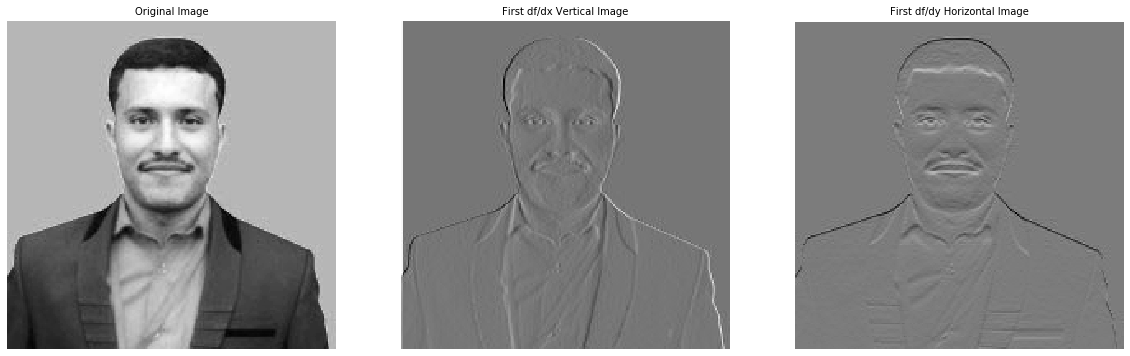

In [11]:
# define loop for fram
fig, axs = plt.subplots(1,3,figsize=(20,20))
# presented orignal image
axs[0].imshow(gray,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')
# First df/dx Vertical Image
axs[1].imshow(FVI,cmap='gray')
axs[1].axis('off')
axs[1].set_title('First df/dx Vertical Image',fontsize='medium')
# First df/dy Horixontal Image
axs[2].imshow(FHI,cmap='gray')
axs[2].axis('off')
axs[2].set_title('First df/dy Horizontal Image',fontsize='medium')
plt.show()

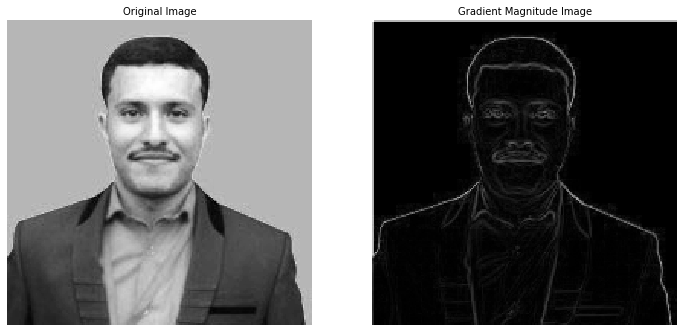

In [12]:
# for read image
FGM = np.array(gradient_magnitude)
# define loop for fram
fig, axs = plt.subplots(1,2,figsize=(12,12))
# presented orignal image
axs[0].imshow(gray,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')
# presented inverse image
axs[1].imshow(FGM,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Gradient Magnitude Image',fontsize='medium')
plt.show()

## Orientations.

In [13]:
print(orientation)

[[45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

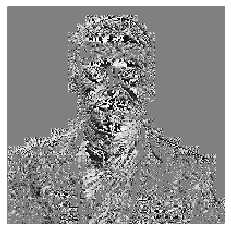

In [14]:
# for read image
FGM = np.array(orientation)
plt.imshow(FGM,cmap='gray')
# for hide axis
plt.axis('off')
# for show image
plt.show()